<a href="https://colab.research.google.com/github/Technocolabs100/Data-Science-20-Feb-Optimizing-Lending-Club-s-Financial-Risk/blob/main/PredictLoan_Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import the Necessary Libraries**

In [3]:
# Import visuals
import seaborn as sns
import matplotlib.pyplot as plt

# Import pandas
import pandas as pd

# Import numpy
import numpy as np

# Import statsmodels
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Import scipy
from scipy.stats import boxcox
from scipy import stats

# Import Warnings
import warnings
warnings.filterwarnings('ignore')

# **Let's Load the Dataset**

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/accepted_2007_to_2018Q4.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Final Project/rejected_2007_to_2018Q4.csv')
df2.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


# **Understand the Dataset**

In [6]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [8]:
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,...,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260638e+06,1.102166e+06,359156.000000,2.260639e+06,2.260639e+06,2.260668e+06,2.258866e+06,2.260639e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260668e+06,2.260523e+06,580775.000000,2260668.0,1.207100e+05,120706.000000,2.260639e+06,2.190392e+06,2.190392e+06,1.394538e+06,...,2.190392e+06,2.190392e+06,2.190392e+06,2.190391e+06,2.190392e+06,2.202078e+06,2.107011e+06,2.190392e+06,2.190392e+06,2.190392e+06,2.190237e+06,2.185289e+06,2.259303e+06,2.260563e+06,2.190392e+06,2.210638e+06,2.210638e+06,2.190392e+06,1.080200e+05,108021.000000,108021.000000,108021.000000,108021.000000,108021.000000,106184.000000,108021.000000,108021.000000,108021.000000,108021.000000,35942.000000,10917.0,10917.000000,10917.0,10917.000000,8651.000000,10917.000000,10917.000000,34246.000000,34246.000000,34246.000000
mean,NaN,1.504693e+04,1.504166e+04,1.502344e+04,1.309283e+01,4.458068e+02,7.799243e+04,1.882420e+01,3.068792e-01,6.985882e+02,7.025884e+02,5.768354e-01,3.454092e+01,72.312842,1.161240e+01,1.975278e-01,1.665846e+04,5.033770e+01,2.416255e+01,4.206891e+03,4.205965e+03,1.208256e+04,1.206439e+04,9.505772e+03,2.431388e+03,1.518453e+00,1.438791e+02,2.398257e+01,3.429346e+03,6.876610e+02,6.755397e+02,1.814580e-02,44.164220,1.0,1.236246e+05,19.251817,4.147942e-03,2.327317e+02,1.424922e+05,9.344199e-01,...,7.726402e+00,8.413439e+00,8.246523e+00,1.400463e+01,5.577951e+00,1.162813e+01,6.373958e-04,2.813652e-03,8.293767e-02,2.076755e+00,9.411458e+01,4.243513e+01,1.281935e-01,4.677109e-02,1.782428e+05,5.102294e+04,2.319377e+04,4.373201e+04,3.361728e+04,669.755603,673.755631,0.633256,1.538997,11.469455,58.169101,3.010554,12.533072,0.046352,0.077568,36.937928,3.0,155.045981,3.0,13.743886,454.798089,11636.883942,193.994321,5010.664267,47.780365,13.191322
std,NaN,9.190245e+03,9.188413e+03,9.192332e+03,4.832138e+00,2.671735e+02,1.126962e+05,1.418333e+01,8.672303e-01,3.301038e+01,3.301124e+01,8.859632e-01,2.190047e+01,26.464094,5.640861e+00,5.705150e-01,2.294831e+04,2.471307e+01,1.198753e+01,7.343239e+03,7.342333e+03,9.901383e+03,9.896992e+03,8.321852e+03,2.679738e+03,1.184159e+01,7.481640e+02,1.312256e+02,6.018248e+03,7.297044e+01,1.110976e+02,1.508131e-01,21.533121,0.0,7.416135e+04,7.822086,6.961656e-02,8.518462e+03,1.606926e+05,1.140700e+00,...,4.701430e+00,7.359114e+00,4.683928e+00,8.038868e+00,3.293434e+00,5.644027e+00,2.710643e-02,5.616522e-02,4.935732e-01,1.830711e+00,9.036140e+0

# **Data Cleaning**

In [9]:
#Find the counts and percentage of the missing values
df_na = pd.DataFrame({'Percent': 100*df.isnull().sum()/len(df), 'Count': df.isnull().sum()})

# Print columns with null count > 0
df_na[df_na['Count'] > 0]

,Percent,Count
member_id,100.00000,2260701
loan_amnt,0.00146,33
funded_amnt,0.00146,33
funded_amnt_inv,0.00146,33
term,0.00146,33
...,...,...
settlement_status,98.48516,2226455
settlement_date,98.48516,2226455
settlement_amount,98.48516,2226455
settlement_percentage,98.48516,2226455


In [10]:
#Check for null values
df.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [11]:
# Create a new dataframe with 88% retention value
df = df.dropna(axis=1, thresh=int(0.75*len(df)))
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,...,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,...,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,...,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,...,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,...,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [12]:
df.isnull().sum(axis = 0)

id                                0
loan_amnt                        33
funded_amnt                      33
funded_amnt_inv                  33
term                             33
                              ...  
total_bc_limit                50063
total_il_high_credit_limit    70309
hardship_flag                    33
disbursement_method              33
debt_settlement_flag             33
Length: 93, dtype: int64

In [13]:
# Create a new dataframe with 88% retention value
df = df.dropna(axis=1, thresh=int(0.75*len(df)))
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,...,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,...,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,...,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,...,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,...,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N


In [14]:
# Get null values for each column
for col in df.columns:
      print("{} : {}".format(col, df[col].isnull().sum()))


id : 0
loan_amnt : 33
funded_amnt : 33
funded_amnt_inv : 33
term : 33
int_rate : 33
installment : 33
grade : 33
sub_grade : 33
emp_title : 167002
emp_length : 146940
home_ownership : 33
annual_inc : 37
verification_status : 33
issue_d : 33
loan_status : 33
pymnt_plan : 33
url : 33
purpose : 33
title : 23358
zip_code : 34
addr_state : 33
dti : 1744
delinq_2yrs : 62
earliest_cr_line : 62
fico_range_low : 33
fico_range_high : 33
inq_last_6mths : 63
open_acc : 62
pub_rec : 62
revol_bal : 33
revol_util : 1835
total_acc : 62
initial_list_status : 33
out_prncp : 33
out_prncp_inv : 33
total_pymnt : 33
total_pymnt_inv : 33
total_rec_prncp : 33
total_rec_int : 33
total_rec_late_fee : 33
recoveries : 33
collection_recovery_fee : 33
last_pymnt_d : 2460
last_pymnt_amnt : 33
last_credit_pull_d : 105
last_fico_range_high : 33
last_fico_range_low : 33
collections_12_mths_ex_med : 178
policy_code : 33
application_type : 33
acc_now_delinq : 62
tot_coll_amt : 70309
tot_cur_bal : 70309
total_rev_hi_lim : 

In [15]:
# Create a new Dataframe that includes valuable columns for prediction
df = df.filter(['loan_amnt','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership', 'issue_d', 'pymnt_plan'
                    'annual_inc','verification_status','purpose','dti','delinq_2yrs','loan_status', 'zip_code', 
                'avg_cur_bal', 'revol_bal'])
df.dtypes

loan_amnt              float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
issue_d                 object
verification_status     object
purpose                 object
dti                    float64
delinq_2yrs            float64
loan_status             object
zip_code                object
avg_cur_bal            float64
revol_bal              float64
dtype: object

In [16]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'issue_d', 'verification_status',
       'purpose', 'dti', 'delinq_2yrs', 'loan_status', 'zip_code',
       'avg_cur_bal', 'revol_bal'],
      dtype='object')

In [17]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [18]:
df['loan_status'].value_counts(dropna=False)

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
NaN                                                         33
Name: loan_status, dtype: int64

In [19]:
# Only keep the values associated with "Fully Paid" and "Charged Off"
df = df.loc[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [20]:
df.shape

(1345310, 17)

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,1345310.0,14419.972014,8717.050787,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,1345310.0,13.239619,4.768716,5.31,9.75,12.74,15.99,30.99
installment,1345310.0,438.075533,261.512604,4.93,248.48,375.43,580.73,1719.83
dti,1344936.0,18.282667,11.160446,-1.00,11.79,17.61,24.06,999.00
delinq_2yrs,1345310.0,0.317794,0.877992,0.00,0.00,0.00,0.00,39.00
avg_cur_bal,1277761.0,13488.609864,16289.696836,0.00,3101.00,7407.00,18717.00,958084.00
revol_bal,1345310.0,16248.114860,22328.168731,0.00,5943.00,11134.00,19755.75,2904836.00


In [22]:
# Drop the null rows since we have sufficient amount of Data
df = df.dropna(axis=0)

In [23]:
# Check for null values
for col in df.columns:
      print("{} : {}".format(col, df[col].isnull().sum()))

loan_amnt : 0
term : 0
int_rate : 0
installment : 0
grade : 0
sub_grade : 0
emp_length : 0
home_ownership : 0
issue_d : 0
verification_status : 0
purpose : 0
dti : 0
delinq_2yrs : 0
loan_status : 0
zip_code : 0
avg_cur_bal : 0
revol_bal : 0


In [24]:
df['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'ANY', 'NONE', 'OTHER'], dtype=object)

In [25]:
df['int_rate'].unique()

array([13.99, 11.99, 10.78, 22.45, 13.44,  9.17,  8.49,  6.49, 11.48,
       12.88, 19.48,  7.49, 19.89, 14.85,  5.32, 17.97, 24.24, 15.77,
        9.8 , 17.27, 18.49,  7.91, 23.13, 20.5 , 16.59, 18.99, 26.06,
       21.48,  6.99, 27.49, 26.99, 27.99, 28.49,  6.  , 25.09, 28.99,
       16.55,  7.89, 13.67, 10.64,  7.26, 14.48, 17.86, 13.18,  6.24,
        8.38, 15.41, 21.99,  9.76, 16.99, 25.99, 12.59, 17.57, 18.2 ,
       22.99,  6.89, 11.22, 19.99, 27.31, 20.99, 27.88, 23.99, 24.99,
       26.77, 12.05,  8.18,  9.99, 10.99, 14.33, 11.49, 16.9 , 11.53,
       18.55, 14.65, 13.33, 12.69, 18.25, 19.19, 12.29, 15.61, 25.78,
       19.52, 24.5 ,  6.39,  5.93,  6.92, 21.67, 20.49, 25.8 , 18.84,
        6.68, 25.57, 25.83, 25.89,  8.67, 14.99, 17.14,  8.19, 11.44,
        6.03, 12.39, 15.59,  9.49, 13.66, 14.31, 12.99, 15.99, 16.49,
       10.49, 19.24, 18.54,  7.34, 11.98, 21.85, 20.39,  9.43,  5.31,
        6.07, 14.07, 15.04, 18.45, 10.9 , 13.58, 17.47, 16.01,  7.96,
       23.87, 30.65,

In [26]:
 df.drop(['issue_d', 'verification_status', 'delinq_2yrs'], axis=1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,purpose,dti,loan_status,zip_code,avg_cur_bal,revol_bal
0,3600.0,36 months,13.99,123.03,C,C4,10+ years,MORTGAGE,debt_consolidation,5.91,Fully Paid,190xx,20701.0,2765.0
1,24700.0,36 months,11.99,820.28,C,C1,10+ years,MORTGAGE,small_business,16.06,Fully Paid,577xx,9733.0,21470.0
2,20000.0,60 months,10.78,432.66,B,B4,10+ years,MORTGAGE,home_improvement,10.78,Fully Paid,605xx,31617.0,7869.0
4,10400.0,60 months,22.45,289.91,F,F1,3 years,MORTGAGE,major_purchase,25.37,Fully Paid,174xx,27644.0,21929.0
5,11950.0,36 months,13.44,405.18,C,C3,4 years,RENT,debt_consolidation,10.20,Fully Paid,300xx,2560.0,8822.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.0,60 months,9.49,377.95,B,B2,5 years,OWN,home_improvement,20.59,Fully Paid,775xx,9927.0,23833.0
2260690,29400.0,60 months,13.99,683.94,C,C3,9 years,MORTGAGE,debt_consolidation,22.03,Fully Paid,900xx,44231.0,77480.0
2260691,32000.0,60 months,14.49,752.74,C,C4,3 years,MORTGAGE,home_improvement,10.34,Charged Off,863xx,29193.0,111598.0
2260692,16000.0,60 months,12.79,362.34,C,C1,10+ years,RENT,medical,12.25,Fully Paid,284xx,5982.0,7700.0


In [27]:
df.shape

(1201260, 17)

In [28]:
df.size

20421420

# **Let's deal with Rejected Dataset**

In [29]:
df2.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [31]:
df2.shape

(27648741, 9)

In [32]:
df2['Loan Title'].value_counts(dropna=False)

Debt consolidation                        6418016
debt_consolidation                        5895211
Other                                     2656222
Credit card refinancing                   2298199
other                                     2042528
                                           ...   
Eliminate high-interest rate debt               1
livingdeliberately                              1
Need some help please                           1
Consolidation of 2 high interest Cards          1
Loan for a car to get back and forth            1
Name: Loan Title, Length: 73929, dtype: int64

In [33]:
df2.isnull().sum(axis=0)

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [34]:
df2.describe()

,Amount Requested,Risk_Score,Policy Code
count,2.764874e+07,9.151111e+06,2.764782e+07
mean,1.313324e+04,6.281721e+02,6.375113e-03
std,1.500964e+04,8.993679e+01,1.127368e-01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.800000e+03,5.910000e+02,0.000000e+00
50%,1.000000e+04,6.370000e+02,0.000000e+00
75%,2.000000e+04,6.750000e+02,0.000000e+00
max,1.400000e+06,9.900000e+02,2.000000e+00


In [35]:
df2['Loan Title'].value_counts(dropna=False)

Debt consolidation                        6418016
debt_consolidation                        5895211
Other                                     2656222
Credit card refinancing                   2298199
other                                     2042528
                                           ...   
Eliminate high-interest rate debt               1
livingdeliberately                              1
Need some help please                           1
Consolidation of 2 high interest Cards          1
Loan for a car to get back and forth            1
Name: Loan Title, Length: 73929, dtype: int64

In [36]:
df2.isnull().sum(axis=0)

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [37]:
df2['Risk_Score'].fillna((df2['Risk_Score'].mean()), inplace=True)

In [38]:
df2.isnull().sum(axis=0)

Amount Requested             0
Application Date             0
Loan Title                1303
Risk_Score                   0
Debt-To-Income Ratio         0
Zip Code                   293
State                       22
Employment Length       951355
Policy Code                918
dtype: int64

In [39]:
df2.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   Amount Requested      27648741 non-null  float64
 1   Application Date      27648741 non-null  object 
 2   Loan Title            27647438 non-null  object 
 3   Risk_Score            27648741 non-null  float64
 4   Debt-To-Income Ratio  27648741 non-null  object 
 5   Zip Code              27648448 non-null  object 
 6   State                 27648719 non-null  object 
 7   Employment Length     26697386 non-null  object 
 8   Policy Code           27647823 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


In [40]:
cateogry_columns=df2.select_dtypes(include=['object']).columns.tolist()
integer_columns=df2.select_dtypes(include=['int64','float64']).columns.tolist()

for column in df2:
    if df2[column].isnull().any():
        if(column in cateogry_columns):
            df2[column]=df2[column].fillna(df2[column].mode()[0])
        else:
          df2[column]=df2[column].fillna(df2[column].mean)


In [41]:
df2.isnull().sum(axis =0)

Amount Requested        0
Application Date        0
Loan Title              0
Risk_Score              0
Debt-To-Income Ratio    0
Zip Code                0
State                   0
Employment Length       0
Policy Code             0
dtype: int64

#**Lets Combine both the Dataset**

In [42]:
combined_dataset = df.join(df2)

In [43]:
combined_dataset.shape

(1201260, 26)

In [44]:
loan = combined_dataset['loan_status'].value_counts()

# **Exploratory Data Analysis**

In [46]:
pip install jupyterthemes

Text(0.5, 0, 'Count')

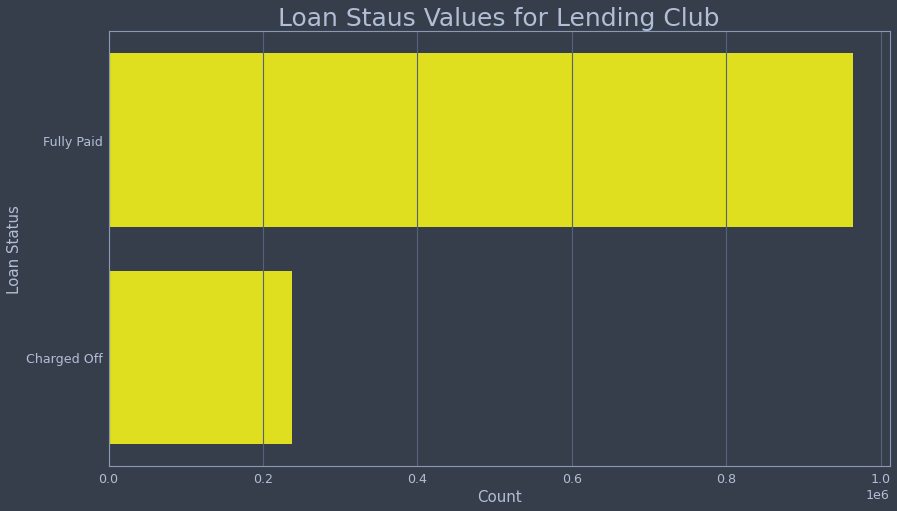

In [52]:
#Plot the value counts
plt.figure(figsize=(14,8))
from jupyterthemes import jtplot
jtplot.style(theme='onedork')


sns.barplot(y = loan.index, x = loan,color = 'yellow')
plt.title('Loan Staus Values for Lending Club',fontsize=25)
plt.ylabel('Loan Status', fontsize=15)
plt.xlabel('Count',fontsize=15)

In [55]:
gr = combined_dataset['grade'].value_counts()

Text(0.5, 0, 'Count')

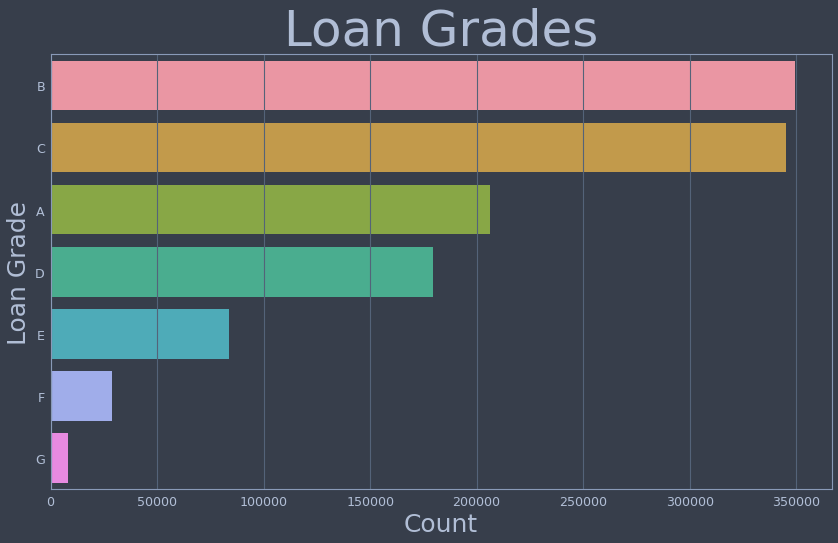

In [58]:
plt.figure(figsize=(14,8))

sns.barplot(y=gr.index, x=gr)
plt.title('Loan Grades', fontsize=50)
plt.ylabel('Loan Grade', fontsize=25)
plt.xlabel('Count', fontsize=25)

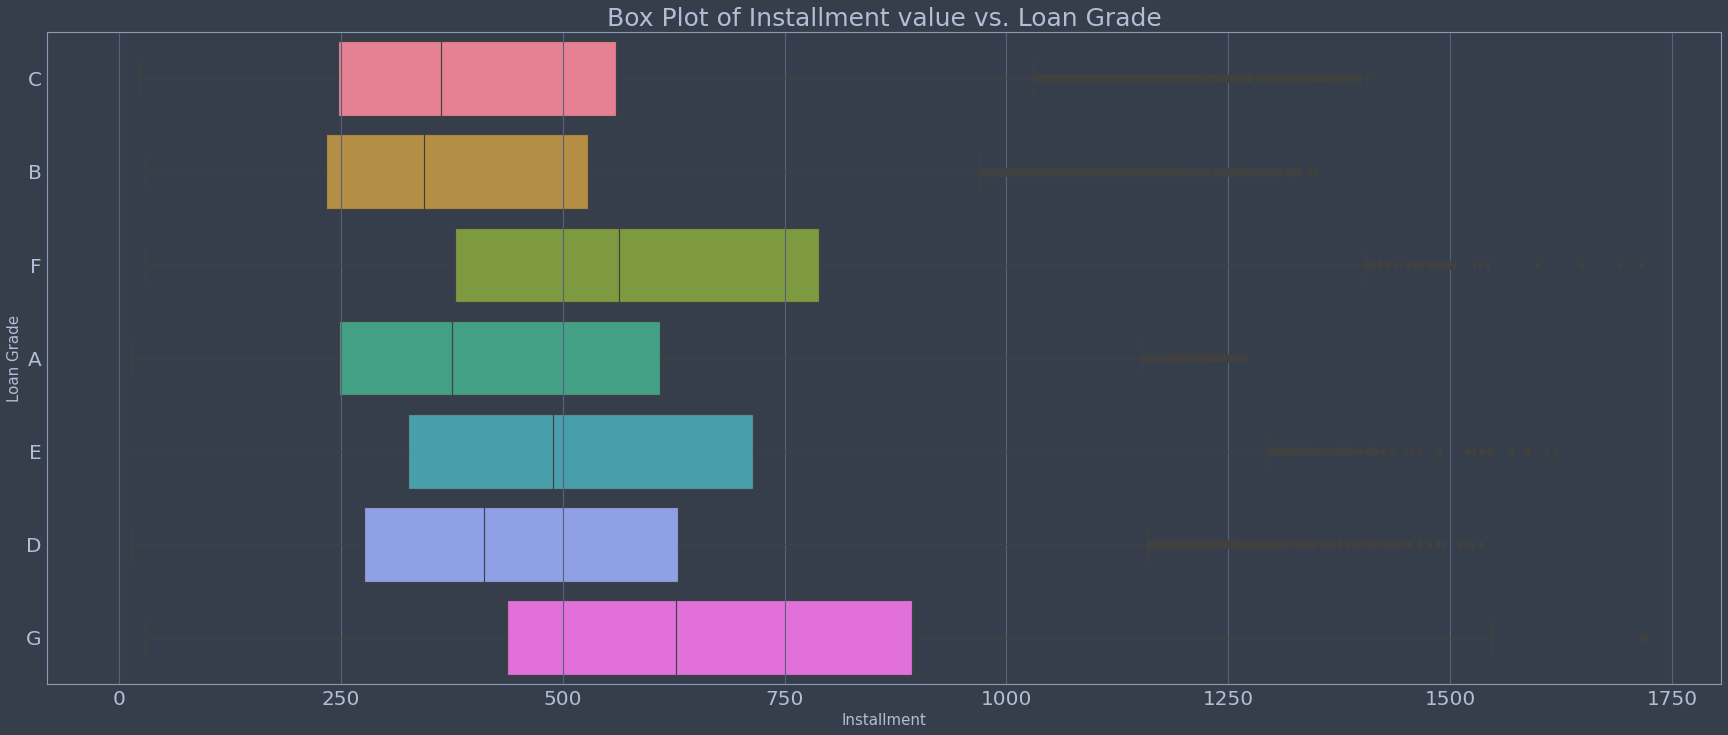

In [59]:
plt.figure(figsize=(30,12))
sns.boxplot(x="installment", y="grade", data=combined_dataset, palette="husl")
plt.title('Box Plot of Installment value vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

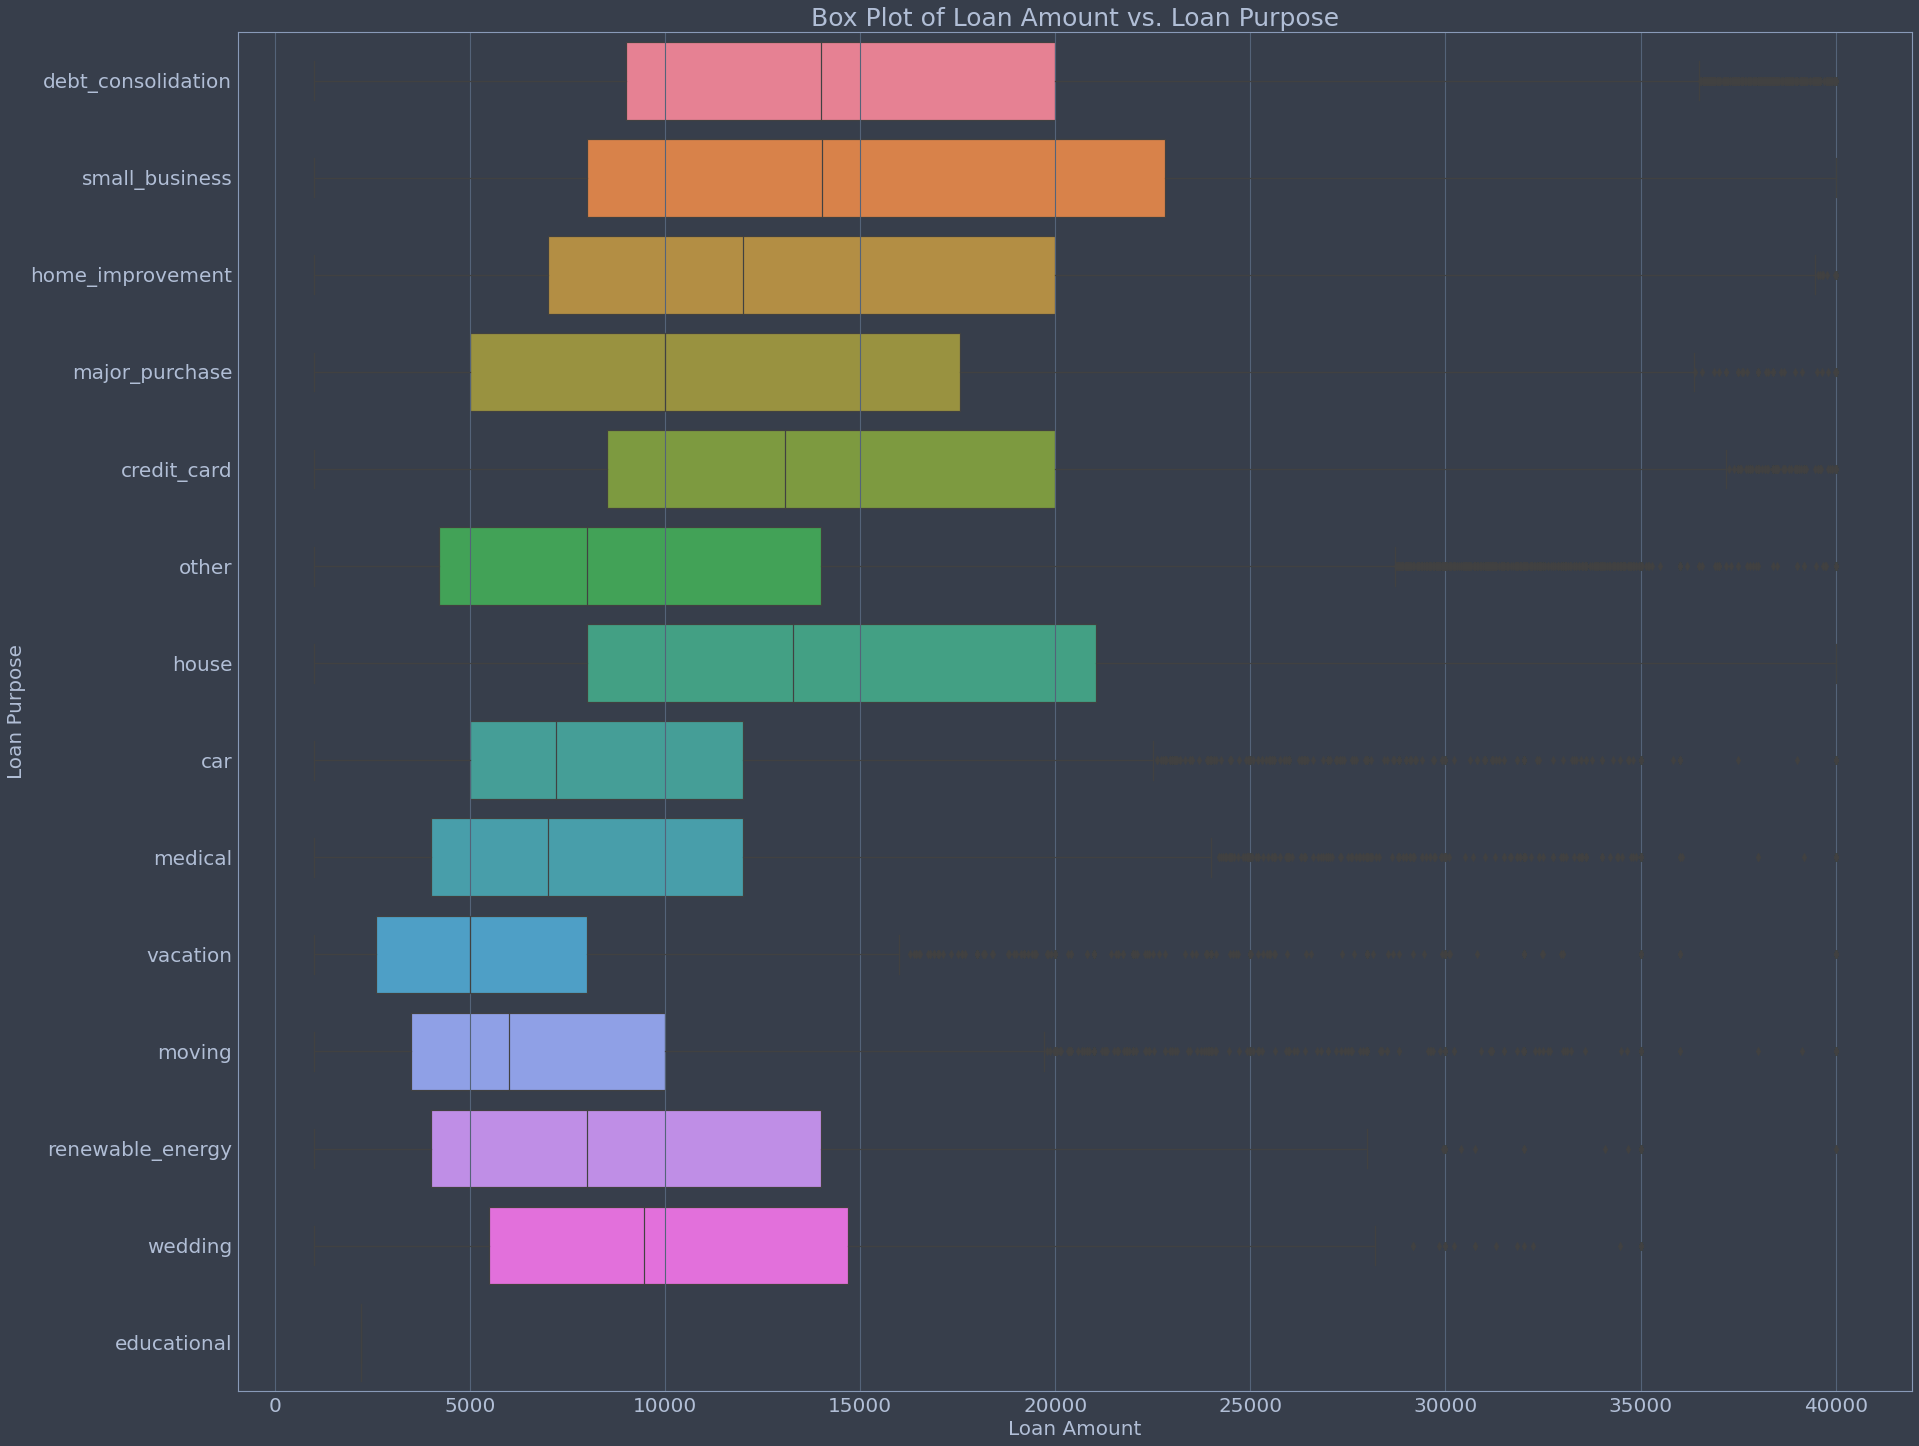

In [60]:

# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(30,25))
sns.boxplot(x="loan_amnt", y="purpose", data=combined_dataset, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

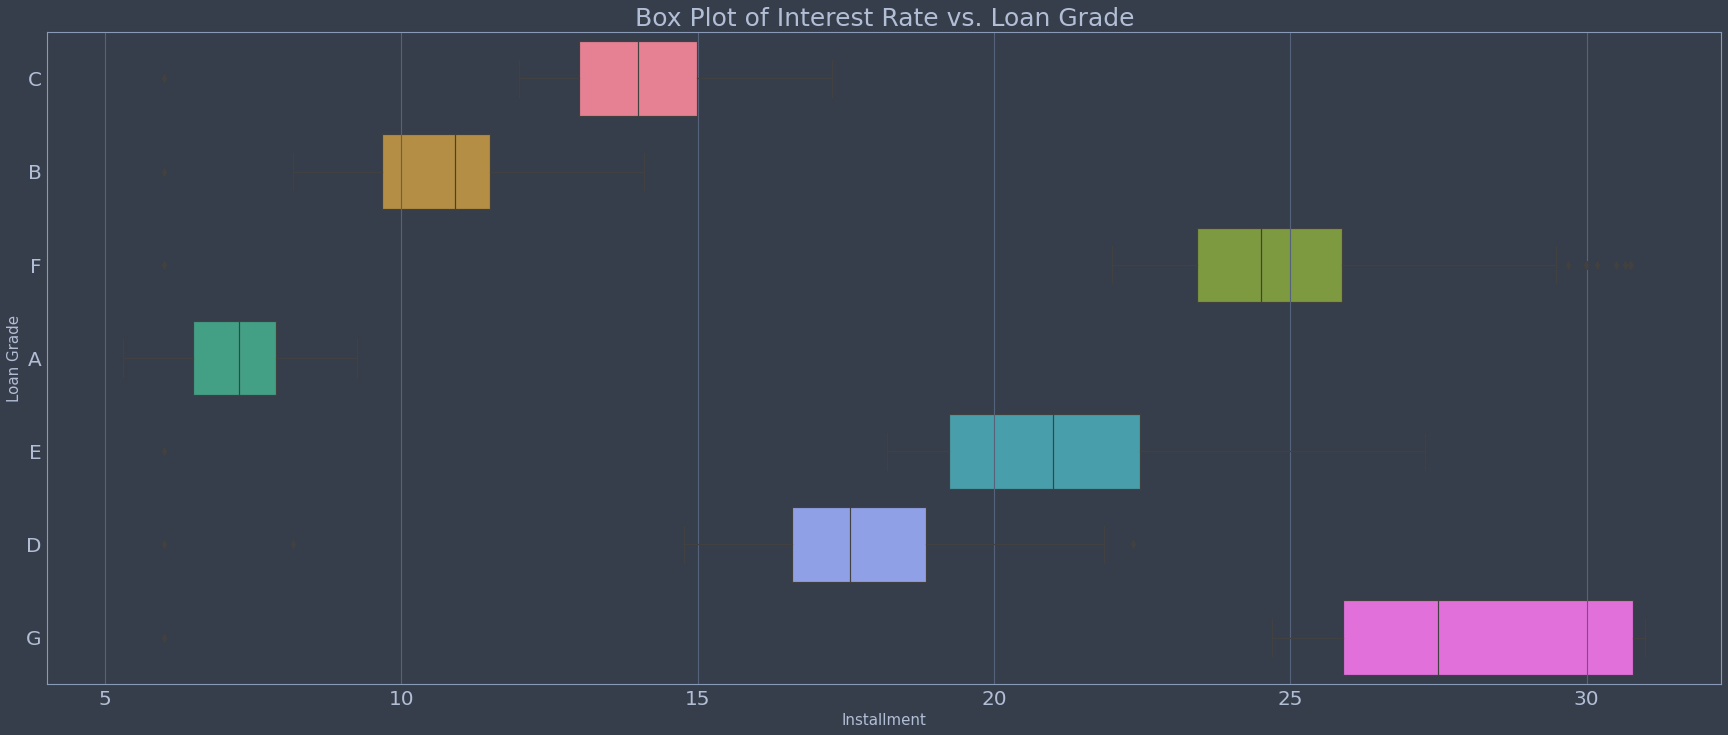

In [61]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,12))
sns.boxplot(x="int_rate", y="grade", data=combined_dataset, palette="husl")
plt.title('Box Plot of Interest Rate vs. Loan Grade', fontsize=25)
plt.xlabel('Installment', fontsize=15)
plt.ylabel('Loan Grade', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

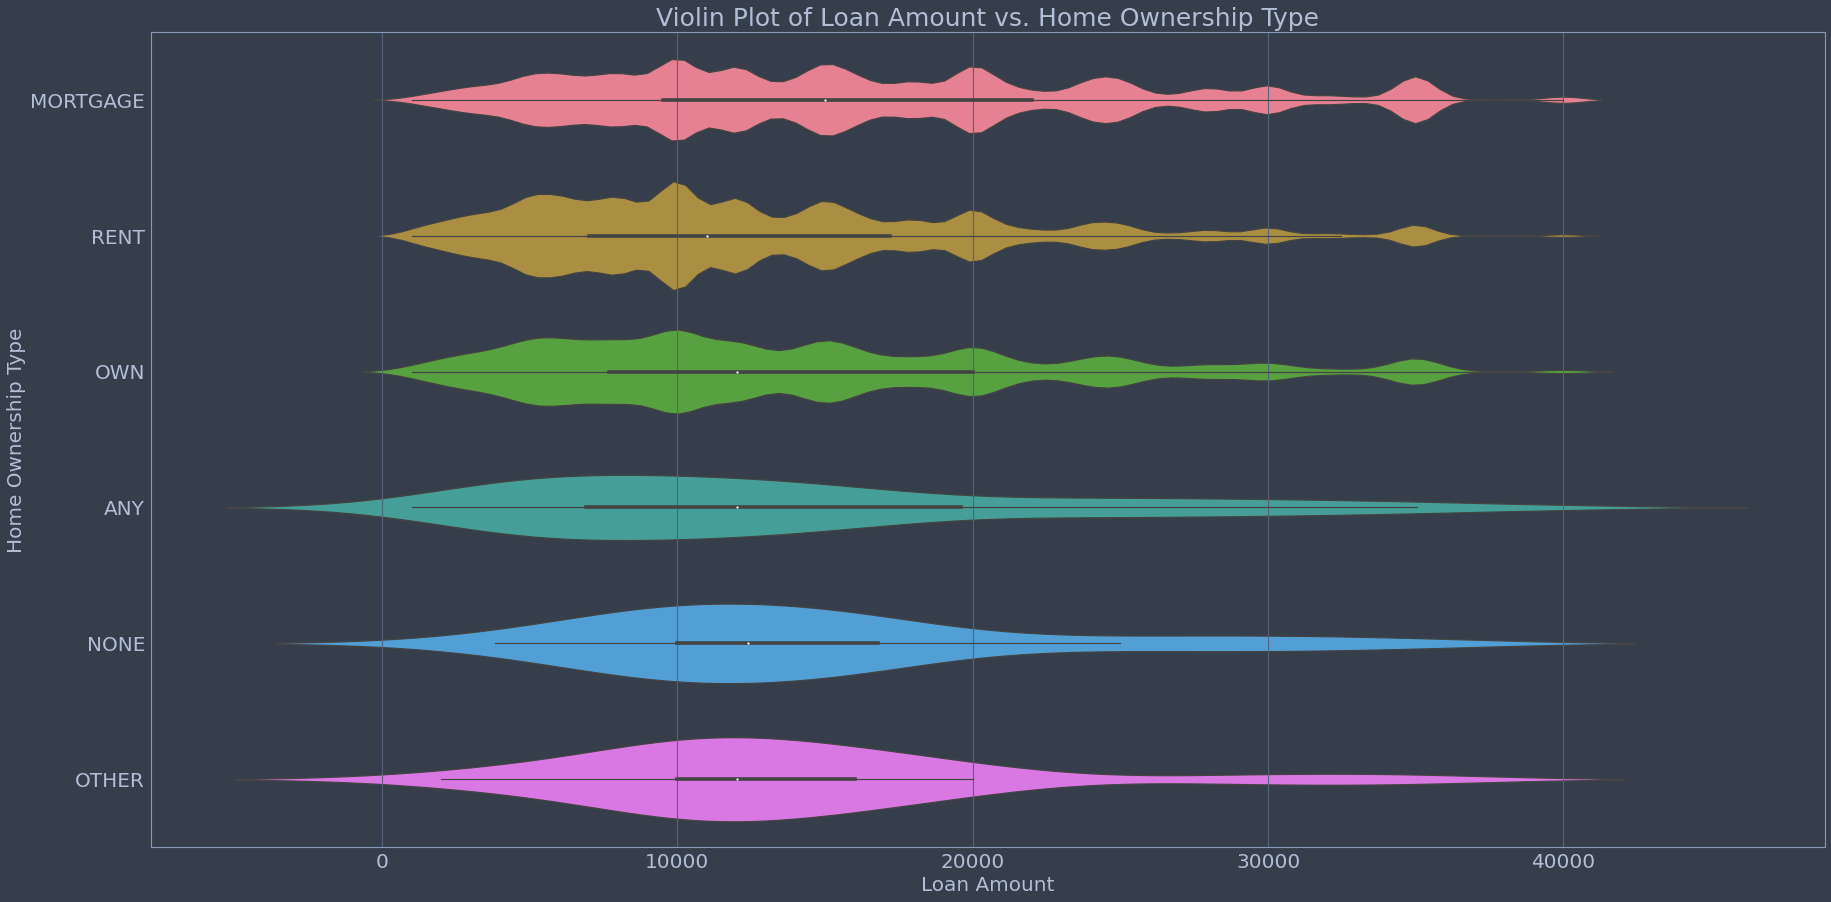

In [62]:
# Plot the borrower's installments compared to load grade
plt.figure(figsize=(30,15))
sns.violinplot(x="loan_amnt", y="home_ownership", data=combined_dataset, palette="husl")
plt.title('Violin Plot of Loan Amount vs. Home Ownership Type', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Home Ownership Type', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

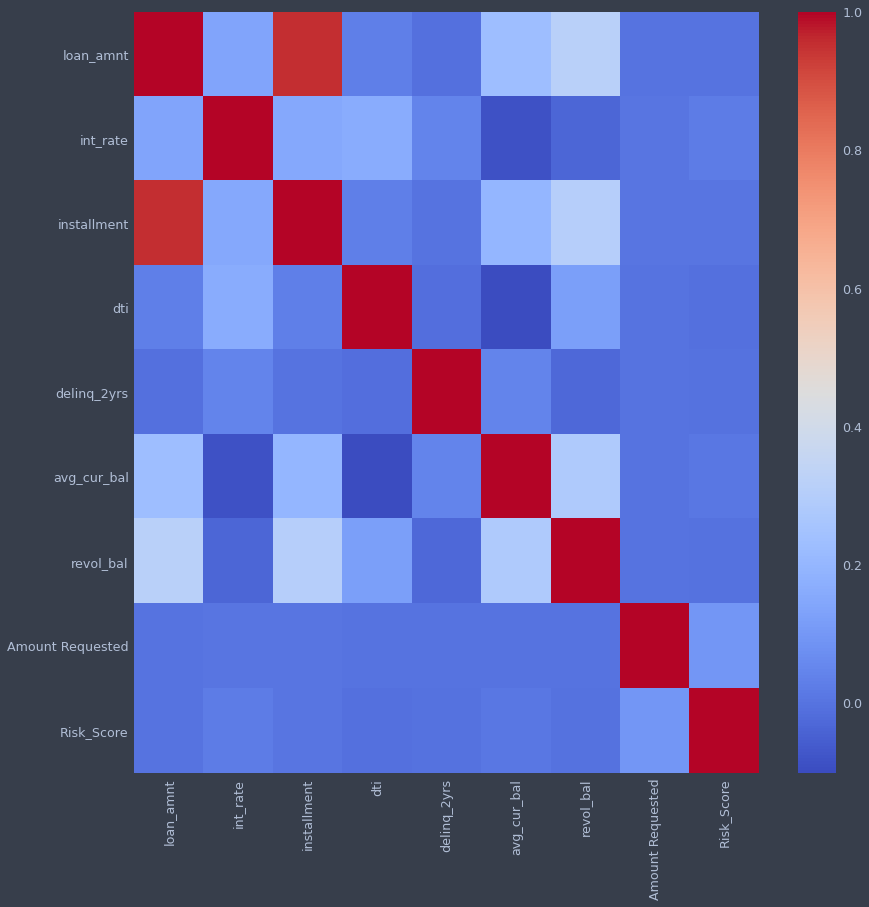

In [63]:
corr = combined_dataset.corr()

# Plot the heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='coolwarm')


There is a strong correlation between installment values and loan amount. This multicollinearity should be removed in the following model because these two values explain the data in the same manner

# **ML Modelling**

It's vital to first split the data into training and test sets, or perhaps use cross-validation techniques to further segment the dataset into composite sets of training and test sets. Then it's important to implement a choice selection of performance metrics that are tied into the initial problem statement.

# **Model Preparation**